In [1]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import torch
import numpy as np

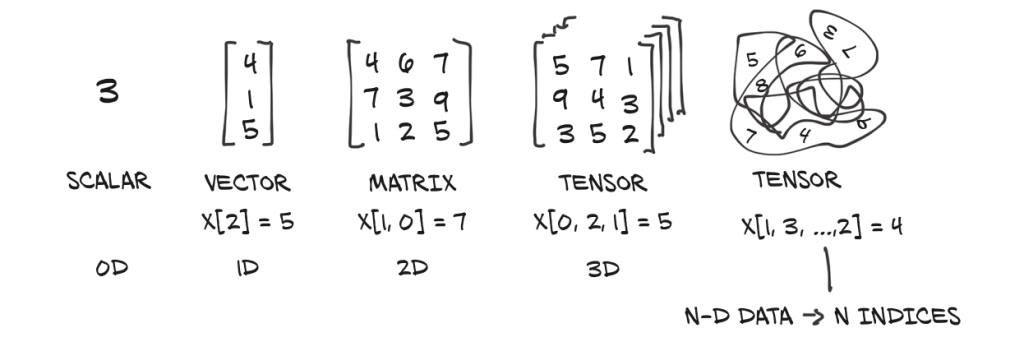

# Vector

In [3]:
x = torch.tensor([1, 2, 3])

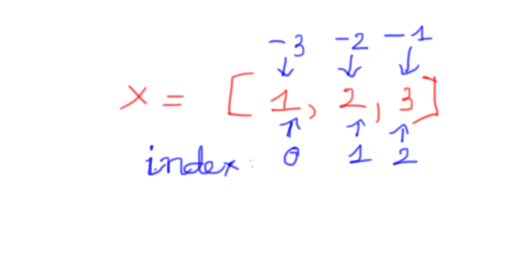

In [ ]:
x[0]

tensor(1)

In [ ]:
x.shape[0]

3

In [ ]:
x[x.shape[0] - 1]

tensor(3)

In [ ]:
x[-1]

tensor(3)

In [5]:
x = torch.tensor([1, 2, 3, 4, 5, 6, 7])

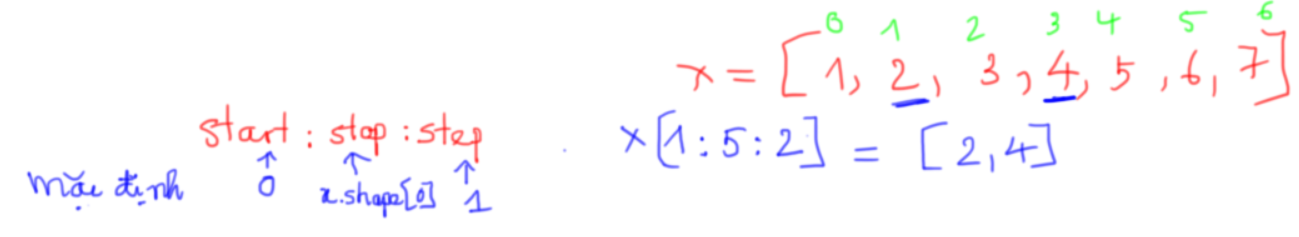

Cú pháp sliding là: **start:stop:step**

In [7]:
#Lấy từ phần tử đầu tiên đến phần tử cuối cùng
x[::2]

tensor([1, 3, 5, 7])

In [8]:
x[1:5:2]

tensor([2, 4])

**Torch tensors không hỗ trợ step âm như python list.**

In [ ]:
x[::-1]

ValueError: step must be greater than zero

# Matrix

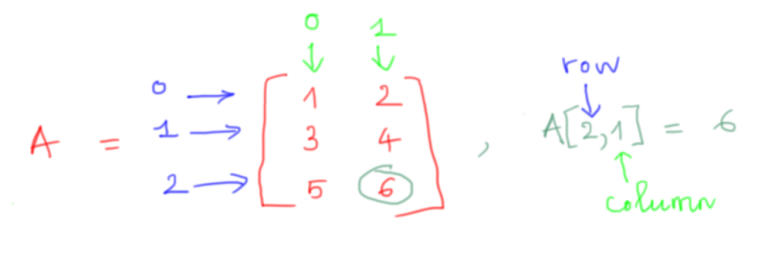

In [9]:
A = torch.tensor([[1, 2], [3, 4], [5, 6]])

In [10]:
A[2, 1]

tensor(6)

In [11]:
#đổi kiểu
float(A[2, 1])

6.0

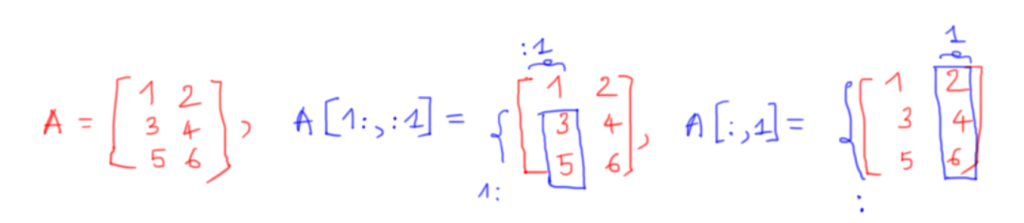

*Ta trận cũng hỗ trợ slicing, tuy nhiên ma trận 2 chiều nên khi slicing thì cần chỉ rõ slice những hàng nào và slide những cột nào.*

In [ ]:

A[1:, :1]

tensor([[3],
        [5]])

In [ ]:
A[:, 1]

tensor([2, 4, 6])

*Slicing cũng truyền hàng trước, cột sau. Phần hàng truyền 1: nên sẽ lấy từ hàng 1 đến hết, còn phần cột truyền :1 nên sẽ hiểu là 0:1 và chỉ lấy cột 0.*

# Dtype

In [ ]:
points = torch.tensor([7, 8, 10, 6.5])

In [ ]:
points.dtype

torch.float32

In [ ]:
points = torch.tensor([7, 8, 10, 6])
points.dtype

torch.int64

In [12]:
points = torch.tensor([7, 8, 10, 6], dtype=torch.short)
points.dtype

torch.int16

In [13]:
points = torch.tensor([7, 8, 10, 6]).short()
points.dtype

torch.int16

# Transpose

In [ ]:
A = torch.tensor([[1, 2], [3, 4], [5, 6]])

In [ ]:
A

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
A.T

tensor([[1, 3, 5],
        [2, 4, 6]])

In [ ]:
A_t = A.transpose(0, 1)
A_t

tensor([[1, 3, 5],
        [2, 4, 6]])

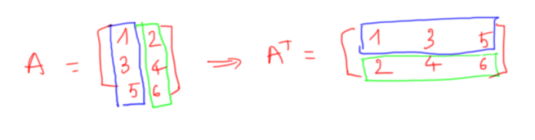

In [ ]:
A.shape, A_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

In [ ]:
A = torch.tensor([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

In [ ]:
A

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])

In [ ]:
A.shape

torch.Size([2, 3, 4])

In [ ]:
A_t = A.transpose(0, 1)

In [ ]:
A_t

tensor([[[ 1,  2,  3,  4],
         [13, 14, 15, 16]],

        [[ 5,  6,  7,  8],
         [17, 18, 19, 20]],

        [[ 9, 10, 11, 12],
         [21, 22, 23, 24]]])

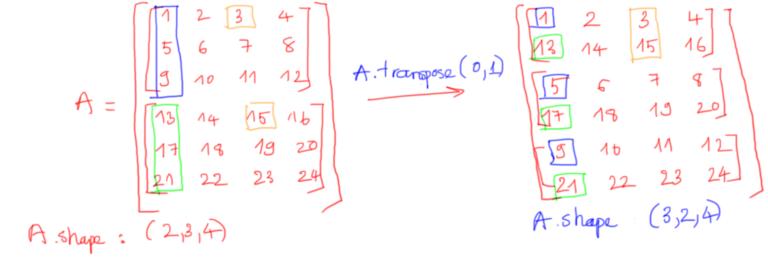

In [ ]:
A_t.shape

torch.Size([3, 2, 4])

# Storage

**Các giá trị trong tensor sẽ được lưu trên 1 vùng nhớ liên tục trên bộ nhớ, được quản lý bởi torch.Storage. Storage là 1 mảng 1 chiều gồm các số có cùng kiểu dữ liệu (ở trên ta biết các giá trị trong 1 tensor cùng kiểu dữ liệu).**

*Ví dụ mình tạo 1 vector với torch, kiểu dữ liệu mặc định với số nguyên sẽ là torch.int64, hay mỗi phần tử cần 8 bytes để lưu trữ.*

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])

In [ ]:
x.storage()

<ipython-input-4-034ee9886547>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x.storage()


 1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

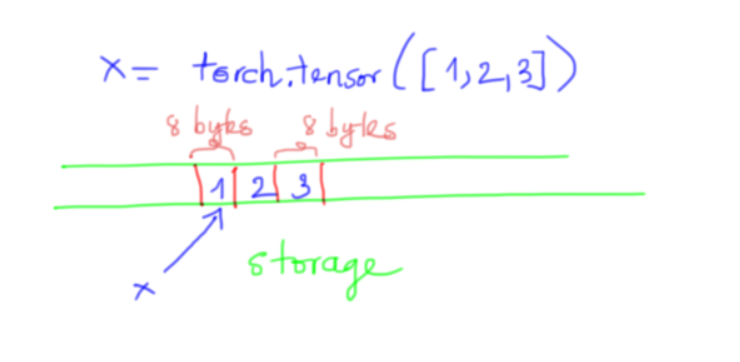

In [ ]:
x[1][2] == x.storage()[5]

tensor(True)

# Tensor metadata: Size, offset, stride

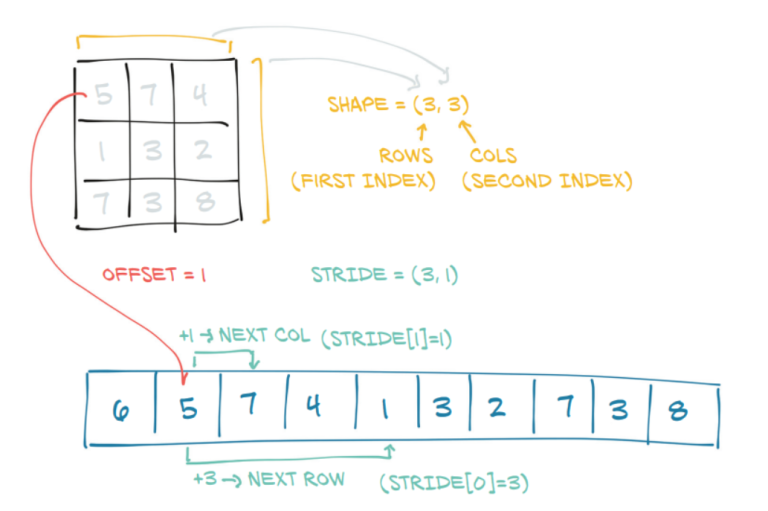

In [14]:
x = torch.tensor([[3, 1, 2], [4, 1, 7]])

In [15]:
x

tensor([[3, 1, 2],
        [4, 1, 7]])


Phần tử x[i][j] sẽ tương ứng với storage[offset +stride[0] * i + stride[1] * j].

In [16]:
x.stride()
# đi 3 ô là đến giá trị cột tiếp theo , đi 1 ô sẽ đến hàng tiếp theo

(3, 1)

In [18]:
x[1][2] == x.storage()[x.storage_offset() + x.stride()[0] * 1 + x.stride()[1] * 2]

tensor(True)

In [20]:
x_t = x.t()

In [21]:
x_t

tensor([[3, 4],
        [1, 1],
        [2, 7]])

Torch tensor x và x_t (transpose) sẽ dùng chung 1 storage thay vì phải copy ra 1 vùng nhớ khác.

In [ ]:
id(x.storage()) == id(x_t.storage())

True

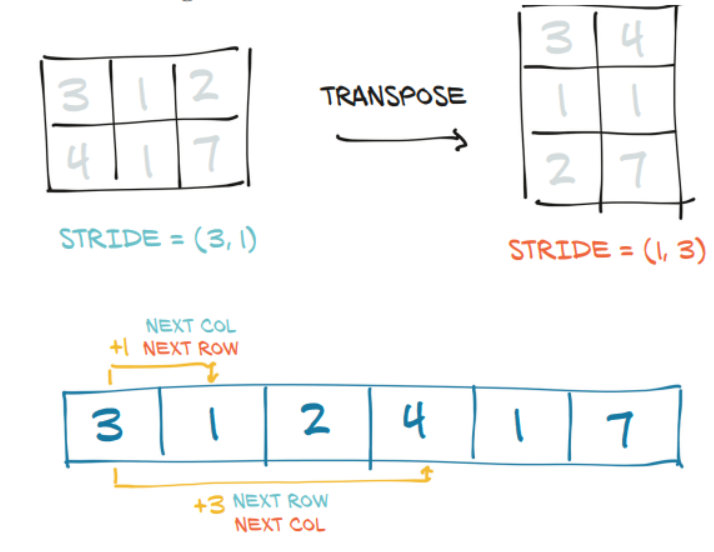

In [22]:
x.stride(), x_t.stride()

((3, 1), (1, 3))

# Contiguous Tensors

In [ ]:
x.is_contiguous()

True

In [ ]:
x_t.is_contiguous()

False

In [ ]:
x_t

tensor([[3, 4],
        [1, 1],
        [2, 7]])

In [ ]:
x_t_con = x_t.contiguous()

In [ ]:
x_t_con

tensor([[3, 4],
        [1, 1],
        [2, 7]])

In [ ]:
x_t_con.is_contiguous()

True

In [ ]:
x_t.storage()

 3
 1
 2
 4
 1
 7
[torch.LongStorage of size 6]

In [ ]:
x_t_con.storage()

 3
 4
 1
 1
 2
 7
[torch.LongStorage of size 6]

# Torch GPU

In [24]:
#dùng cuda để chạy trên GPU của máy
x_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device='cuda')

In [25]:
x_gpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')

In [26]:
x = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
x

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [27]:
x_gpu = x.to(device='cuda')
x_gpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')

In [28]:
x_cpu = x_gpu.to(device='cpu')
x_cpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [29]:
x_cpu = x_gpu.cpu()
x_cpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

# Torch to Numpy

In [30]:
x = torch.tensor([1,2,3])

In [31]:
x_np = x.numpy()

In [32]:
x_np

array([1, 2, 3])

In [33]:
x[1] = 0
x, x_np

(tensor([1, 0, 3]), array([1, 0, 3]))

In [34]:
x_np = np.array([1, 2, 3])

In [35]:
x_cpu = torch.from_numpy(x_np)

In [36]:
x_gpu = torch.tensor([1, 2, 3], device='cuda')

In [ ]:
x_np = x_gpu.numpy()

TypeError: ignored

In [ ]:
x_np = x_gpu.cpu().numpy()

In [ ]:
x_np

array([1, 2, 3])

In [ ]:
x_gpu[1] = 0

In [ ]:
x_gpu, x_np

(tensor([1, 0, 3], device='cuda:0'), array([1, 2, 3]))